In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Load DataA.csv 

dataB = pd.read_csv(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\ece_657a_assignments-master\ece_657a_assignments-master\Assignment_1\Datasets\DataB.csv')

In [3]:
dataB.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


## Unnamed Column in the datas set removed:

In [4]:
dataB_updated = dataB.drop(['Unnamed: 0'], axis=1)
print("Updated Dataset after removal of 'Unnamed: 0' column: \n", dataB_updated.head(20))

uniqueValues = dataB['gnd'].unique()
print(uniqueValues) #Unique Values in Column

Updated Dataset after removal of 'Unnamed: 0' column: 
     fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0       4      4      3      0      0      4      2      1      4       1   
1       5      1      4      3      1      3      5      1      4       4   
2       1      3      0      3      1      1      0      1      0       2   
3       5      3      2      3      5      2      2      0      4       5   
4       3      5      3      3      0      4      1      1      4       3   
5       0      0      1      5      0      5      2      4      3       2   
6       1      3      3      5      3      2      4      4      2       1   
7       3      3      0      5      2      1      2      5      3       0   
8       5      0      3      3      1      3      0      0      2       3   
9       5      5      4      5      3      1      0      0      4       1   
10      1      4      2      1      4      4      3      5      0       3   
11      5      2    

In [5]:
#Checking missing values in Dataset
dataB_updated.isna().sum()

fea.1      0
fea.2      0
fea.3      0
fea.4      0
fea.5      0
          ..
fea.781    0
fea.782    0
fea.783    0
fea.784    0
gnd        0
Length: 785, dtype: int64

In [6]:
dataB_updated.isna().sum().sum()

0

### No missing values in dataset

### 1.  Executing PCA from sratch Using Python : Step by Step

##### Step 1 Standardizing the dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X,y=dataB.iloc[:,1:].values,dataB.iloc[:,0].values

In [9]:
# To split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [10]:
#To standardize features
stansc=StandardScaler()
X_train_std=stansc.fit_transform(X_train)
X_test_std=stansc.transform(X_test)

##### Step 2 Constructing Covariance Matrix and decomposing it into Eigen Values and Eigen Vectors

In [11]:
cov_mat=np.cov(X_train_std.T)
dataB_eigen_values,dataB_eigen_vectors=np.linalg.eig(cov_mat)

In [12]:
dataB_eigen_values # Eigen Values :

array([5.20286861e+01, 2.88048549e+01, 2.75566117e+01, 2.40591802e+01,
       2.13365943e+01, 1.63060554e+01, 1.36719064e+01, 1.22752984e+01,
       1.07561464e+01, 1.01983670e+01, 9.24369939e+00, 8.44860285e+00,
       7.64548992e+00, 7.31309904e+00, 7.03727511e+00, 6.56545504e+00,
       6.26656122e+00, 6.16414170e+00, 5.97270910e+00, 5.71558926e+00,
       5.64518093e+00, 5.43068686e+00, 5.35465881e+00, 5.07781053e+00,
       4.99438486e+00, 4.68728826e+00, 4.51323364e+00, 4.44703866e+00,
       4.38430975e+00, 4.31697605e+00, 4.27529745e+00, 4.18778992e+00,
       4.07638486e+00, 4.04388343e+00, 3.88080511e+00, 3.77432534e+00,
       3.76488964e+00, 3.55314736e+00, 3.45347354e+00, 3.36008637e+00,
       3.31488855e+00, 3.23103414e+00, 3.21415989e+00, 3.14831871e+00,
       3.07532384e+00, 3.03260732e+00, 2.98027637e+00, 2.96233066e+00,
       2.90272767e+00, 2.84950274e+00, 2.83497459e+00, 2.76415346e+00,
       2.72942890e+00, 2.69719972e+00, 2.67189498e+00, 2.58427791e+00,
      

In [13]:
dataB_eigen_vectors #Eigen Vectors

array([[-0.00527766,  0.00109112, -0.00162038, ..., -0.0001822 ,
         0.00025743, -0.00047106],
       [-0.00017864, -0.00586636, -0.00288548, ...,  0.00090423,
        -0.01122424,  0.00039155],
       [-0.00067033,  0.00191026,  0.00369498, ...,  0.00726502,
        -0.01488557, -0.00079559],
       ...,
       [ 0.00053964,  0.01013802, -0.00664226, ..., -0.00107947,
         0.00279873, -0.01056618],
       [-0.0114084 ,  0.00505945, -0.00898704, ...,  0.00065964,
         0.01050193, -0.00436916],
       [ 0.02440569, -0.06406364, -0.08509499, ...,  0.01550064,
        -0.01443132, -0.01811137]])

##### Step 3 : Sorting Eigen Values by descending order to rank Eigen Vectors

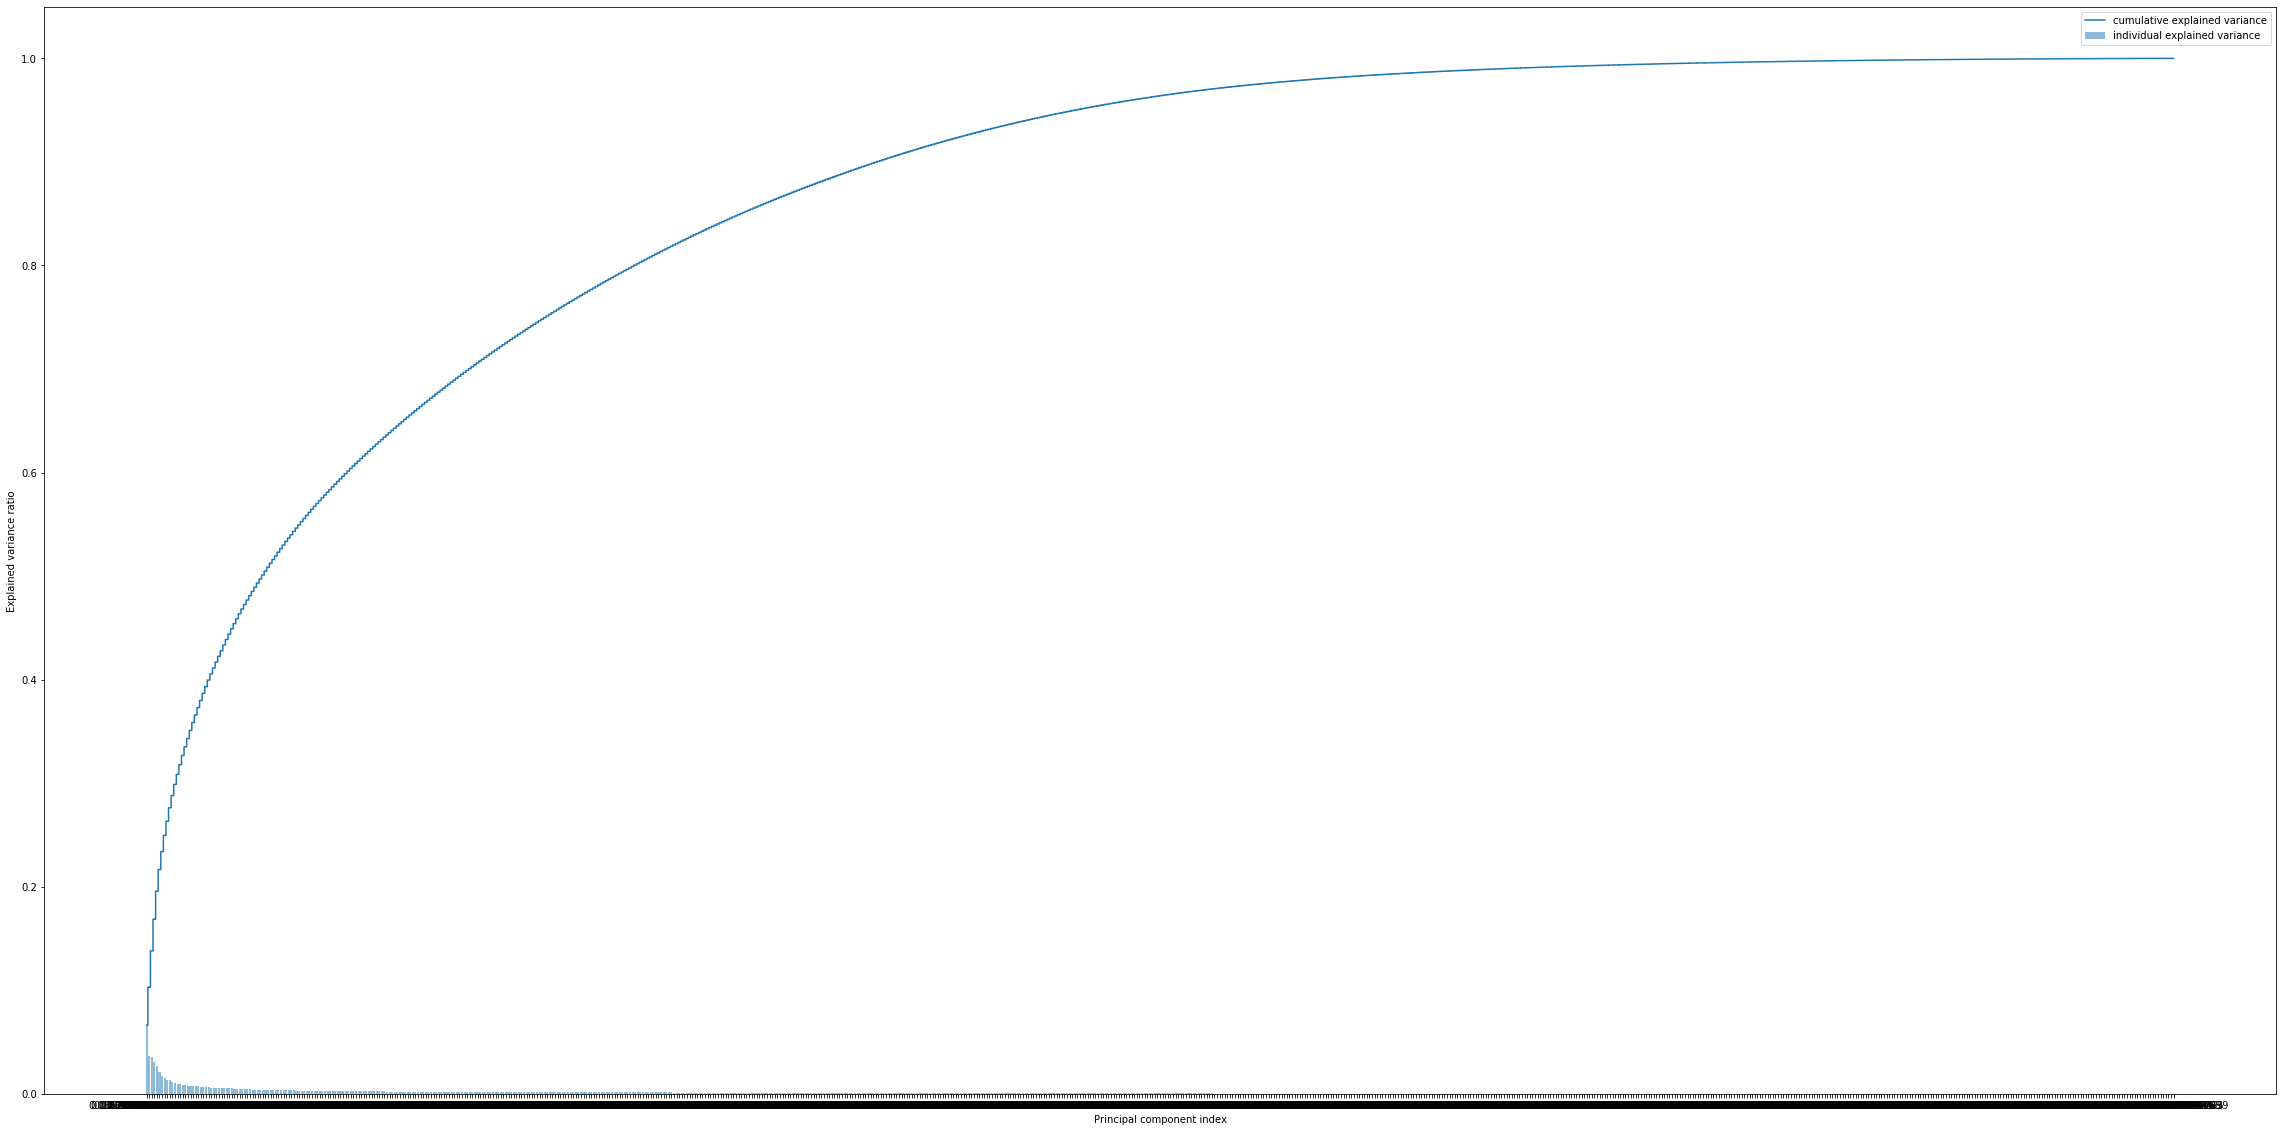

In [14]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(dataB_eigen_values)
var_exp = [(i/tot) for i in sorted(dataB_eigen_values, reverse=True)]
y_pos=np.arange(len(var_exp))
#y_pos=range (1,784)
#len(var_exp)
#print(var_exp.count)
#print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(40,20))
# plot explained variances
plt.bar(y_pos,var_exp,align='center', alpha=0.5,label='individual explained variance')
#plt.xticks(y_pos,var_exp)
plt.step(y_pos, cum_var_exp,where= 'mid',label='cumulative explained variance')
plt.xticks(y_pos,cum_var_exp)
plt.ylabel('Explained variance ratio')

plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

### It can be seen from above that the cummulative variance of first few principal components explain almost 60 % of variance in the dataset

<BarContainer object of 785 artists>

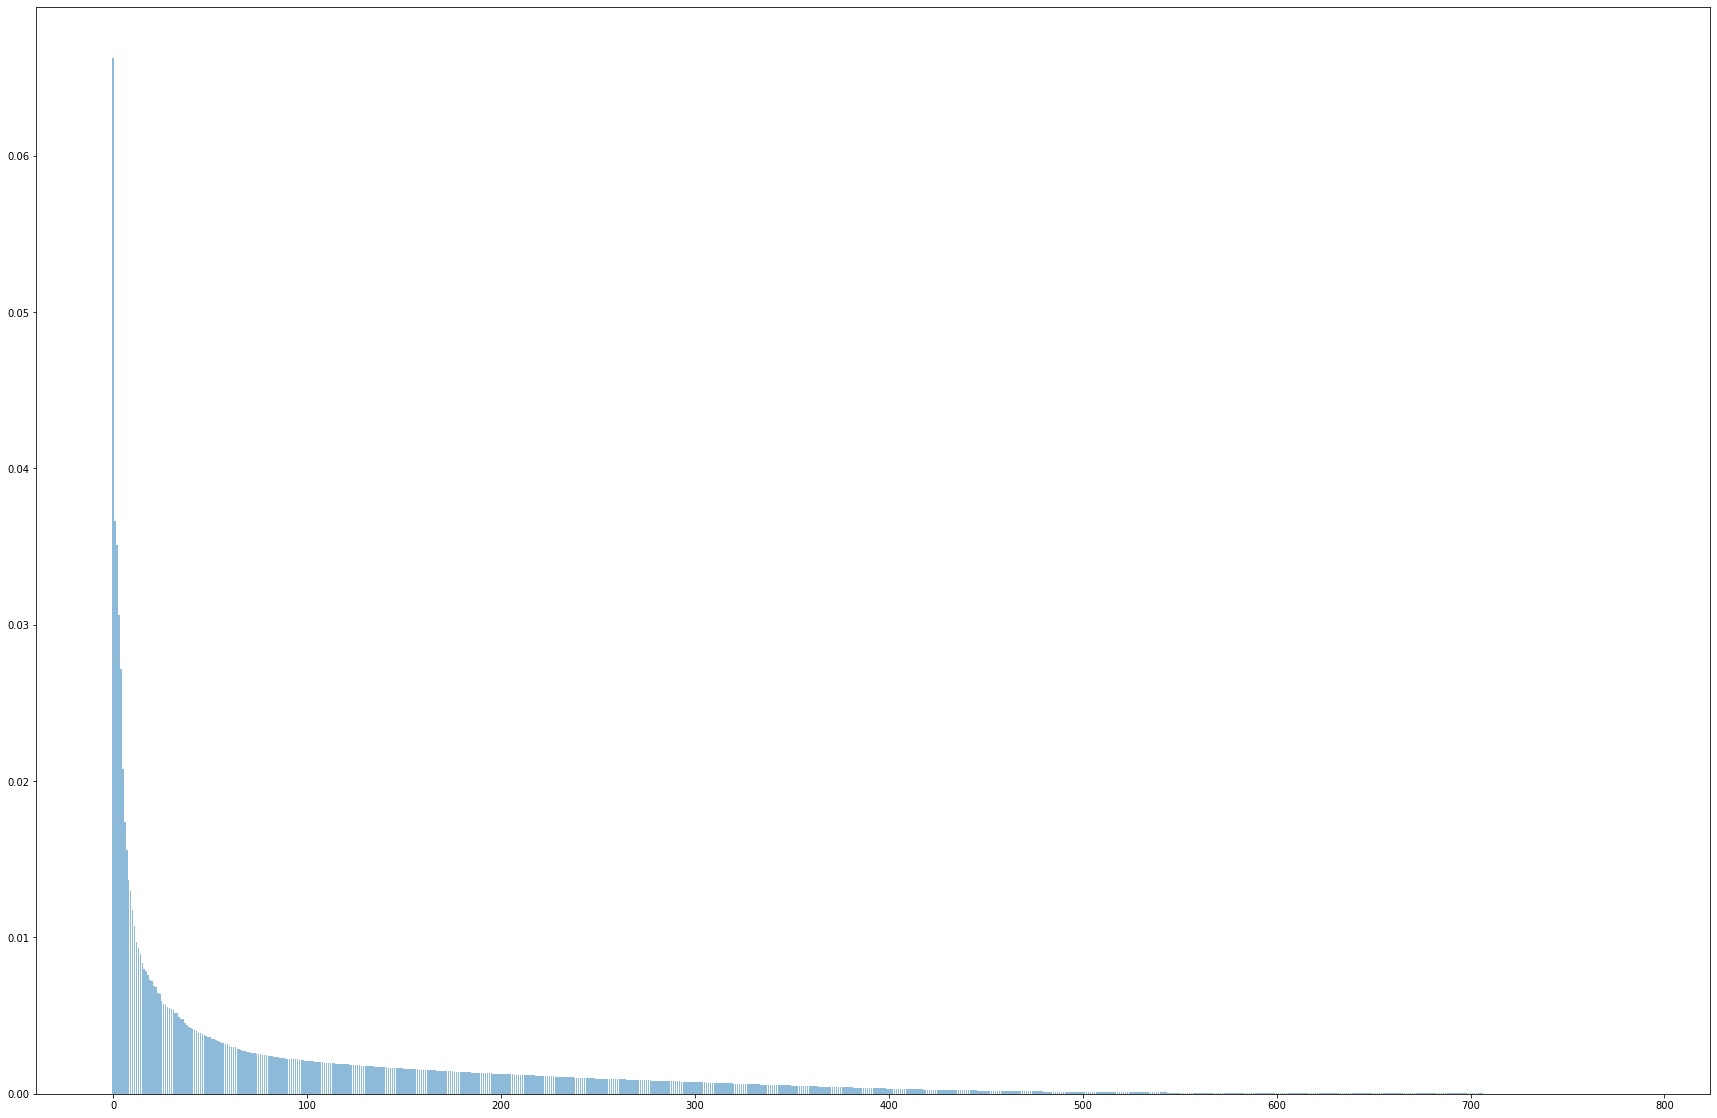

In [15]:
plt.figure(figsize=(30,20))
plt.bar(y_pos,var_exp,align='center', alpha=0.5,label='individual explained variance')

### It can be seen that 1st 25 principal components (approximately) are most accountable 

##### Step 4 Feature Extraction 

In [16]:
#Sorted Eigen Pairs by decreasing order of the Eigen Values

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(dataB_eigen_values[i]), dataB_eigen_vectors[:, i]) for i in range(len(dataB_eigen_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [17]:
#Considering 1st two PCA Components

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis] ,eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis] ,eigen_pairs[5][1][:, np.newaxis] ))
print('Matrix W:\n', w)

rows=len(w)
columns=len(w[0])
print(rows)
print(columns)



Matrix W:
 [[-0.00527766  0.00109112 -0.00162038  0.01303178  0.00740709 -0.0030389 ]
 [-0.00017864 -0.00586636 -0.00288548  0.00610434 -0.00543435 -0.00031781]
 [-0.00067033  0.00191026  0.00369498 -0.00210752 -0.00608522  0.00314961]
 ...
 [ 0.00053964  0.01013802 -0.00664226 -0.00363434 -0.0035935   0.00170794]
 [-0.0114084   0.00505945 -0.00898704  0.00273568  0.00150111 -0.00637981]
 [ 0.02440569 -0.06406364 -0.08509499  0.07505388  0.05681482 -0.0292049 ]]
785
6


[[ 0.34185752 -0.33905244 -0.96230646 ...  1.03440486 -0.33543241
   0.67964891]
 [-0.33252989  0.33071508  0.3776022  ...  1.03440486  0.98618956
   1.39491262]
 [-0.33252989 -1.00881996 -0.29235213 ... -0.9423565   0.32537858
  -0.03561479]
 ...
 [ 1.01624493  0.33071508 -0.29235213 ... -0.28343605 -0.99624339
  -0.75087849]
 [-1.0069173  -0.33905244 -0.96230646 ...  0.37548441 -1.65705438
  -0.03561479]
 [ 1.69063234 -1.00881996  1.04755652 ... -0.9423565   0.32537858
   1.39491262]]
1446
785
[ 7.82111255  0.05920414  0.87798954 -2.10556227  1.41981269 -0.97863902]
[[  7.82111255   0.05920414   0.87798954  -2.10556227   1.41981269
   -0.97863902]
 [  0.44332697  -8.64706805 -11.50382318   2.04912451   5.33776547
   -0.14697681]
 [ -1.32073908   8.54560402  -3.22775028   4.51360923  -3.9819731
    0.2071489 ]
 ...
 [  8.23832065   2.20869371  -0.93897248  -6.06134131  -0.76594151
    1.24320361]
 [  7.43067232   1.52683747   2.62946675  -1.16291974  -2.88406977
    1.86114528]
 [ -7.

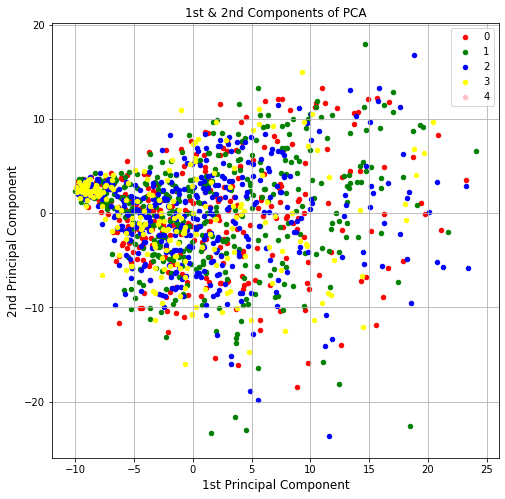

In [18]:
print(X_train_std)
print(len(X_train_std))
print(len(X_train_std[0]))

X_train_std[0].dot(w)
print(X_train_std[0].dot(w))
X_train_pca = X_train_std.dot(w)

print(X_train_pca)

print("First PCA Component")
print(X_train_pca[y_train==1,0])
print("Second PCA Component")
print(X_train_pca[y_train==1,1])


dataB_df_PCA = pd.DataFrame(X_train_pca, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
dataB_finalDf = pd.concat([dataB_df_PCA, dataB_updated[['gnd']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('1st Principal Component', fontsize = 12)
ax.set_ylabel('2nd Principal Component', fontsize = 12)
ax.set_title('1st & 2nd Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = dataB_finalDf['gnd'] == target
    ax.scatter(-dataB_finalDf.loc[indicesToKeep, 'Component 1']
                 , dataB_finalDf.loc[indicesToKeep, 'Component 2']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

# 2. Using PCA method of sklearn

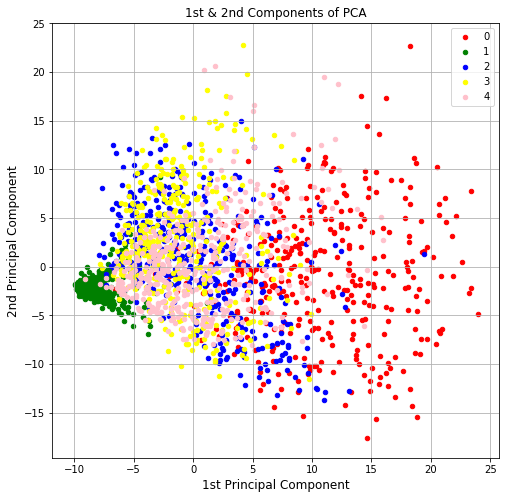

In [19]:
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = dataB_updated.iloc[:,1:785]
df_mean = np.mean(df.T, axis=1)
df_norm = df - df_mean;
df_cov = np.cov(df_norm.T)
df_eigval, df_eigvec = eig(df_cov)
#print("Eigenvalues : ")
#print(df_eigval)
#print(" ")
#print("Eigenvectors : ")
#print(df_eigvec)

p = df.astype(float)
scaler = StandardScaler()
p = scaler.fit_transform(p)
pca = PCA(n_components=6)
pca_array = pca.fit_transform(p)
pca_val = pca.explained_variance_


df_PCA = pd.DataFrame(pca_array, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
finalDf = pd.concat([df_PCA, dataB_updated[['gnd']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('1st Principal Component', fontsize = 12)
ax.set_ylabel('2nd Principal Component', fontsize = 12)
ax.set_title('1st & 2nd Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gnd'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                 , finalDf.loc[indicesToKeep, 'Component 2']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

# 3. Repeated Step 2 for 5th and 6th components

Step 1. Calculated 5th and 6th Components on Scatter Plot

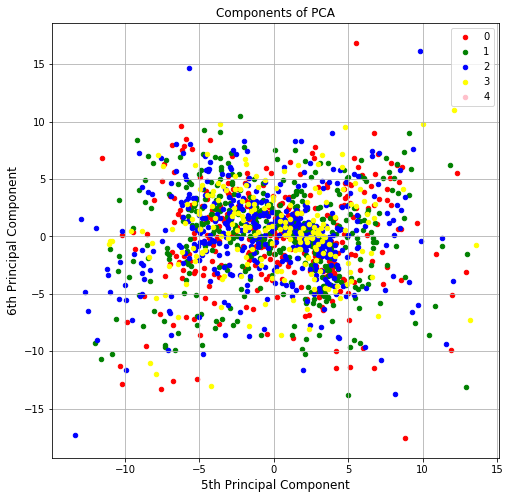

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('5th Principal Component', fontsize = 12)
ax.set_ylabel('6th Principal Component', fontsize = 12)
ax.set_title('Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = dataB_finalDf['gnd'] == target
    ax.scatter(-dataB_finalDf.loc[indicesToKeep, 'Component 5']
                 , dataB_finalDf.loc[indicesToKeep, 'Component 6']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

Step 2 Calculated 5th and 6th components on Scatter plot

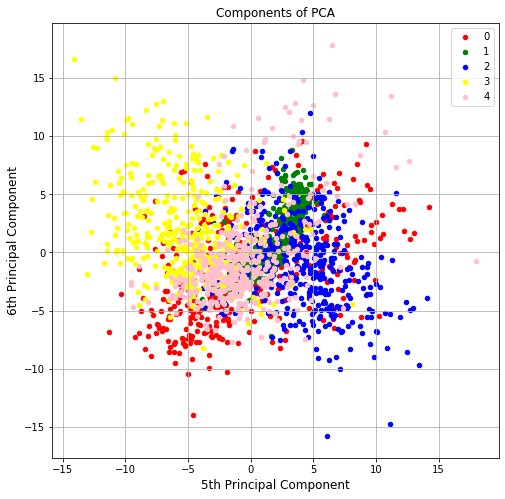

In [21]:
df_PCA = pd.DataFrame(pca_array, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
finalDf = pd.concat([df_PCA, dataB_updated[['gnd']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('5th Principal Component', fontsize = 12)
ax.set_ylabel('6th Principal Component', fontsize = 12)
ax.set_title('Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gnd'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 5']
                 , finalDf.loc[indicesToKeep, 'Component 6']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

## Comments on the Result , From scatter Plot of 1st and 2nd PCA Components it can be seen that the its is easier to classify because of higher correlation
## Whereas, From scatter Plot of 5th and 6th Components it can be seen that its difficult to classify beacuse all of the class markers are dispersed in one area which represents that the correlation is lesser hence making classification harder

# II 4. Use Naive Bayers to classify 


In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB() #Gaussian Naive Bayes

In [23]:
gnd_dataB=dataB.iloc[:,785]
print(gnd_dataB)

0       0
1       0
2       0
3       0
4       0
       ..
2061    4
2062    4
2063    4
2064    4
2065    4
Name: gnd, Length: 2066, dtype: int64


In [24]:
df_dataB=dataB.iloc[:,1:785]
print(df_dataB)

      fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0         4      4      3      0      0      4      2      1      4       1   
1         5      1      4      3      1      3      5      1      4       4   
2         1      3      0      3      1      1      0      1      0       2   
3         5      3      2      3      5      2      2      0      4       5   
4         3      5      3      3      0      4      1      1      4       3   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
2061      4      0      3      0      4      0      4      3      1       2   
2062      2      2      3      4      2      1      2      3      3       4   
2063      2      3      2      3      1      2      5      5      5       0   
2064      5      2      4      3      1      0      3      2      2       1   
2065      3      3      1      3      2      5      4      2      2       4   

      ...  fea.775  fea.776  fea.777  fea.778  fea.

In [25]:

dataB_float=df_dataB.astype(float) #casted datatype into float
# print(dataB_float)
scaler= StandardScaler()
dataB_transfit=scaler.fit_transform(dataB_float)
# print(dataB_transfit)
cov_matrix_PCA_784=PCA(n_components=784)
pca_array_784=cov_matrix_PCA_784.fit_transform(dataB_transfit)
print(pca_array_784)
pca_784_expvar=cov_matrix_PCA_784.explained_variance_
print(pca_784_expvar)

[[ 9.97069222e+00 -6.18172201e+00 -4.99286326e+00 ...  2.84664097e-02
  -6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01 -6.94158705e+00 -5.06302886e+00 ...  2.28147473e-01
  -4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00 -4.69309729e+00 -2.90865640e+00 ... -1.15182625e-01
   5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01 -9.33681056e-01  8.10744188e+00 ...  6.93521885e-02
   8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00 -2.09047425e+00  6.27251911e+00 ... -1.26995790e-01
  -1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00  2.46166632e-01  4.14018317e+00 ... -1.57632818e-02
   1.77113186e-02 -1.11643749e-02]]
[5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.01821733e+00 6.72923900e+00
 6.17171361e+00 6.03035494e+00 5.97218819e+00 5.74588510e+00
 5.56641979e+00 5.34085526e+00 5.30999748e+00 5.07244463e+0

In [26]:
# Retained Variance
retvar_2= sum(pca_784_expvar[0:2]/sum(pca_784_expvar))
print("Retained variance of 1st two principal components is ",retvar_2)

Retained variance of 1st two principal components is  0.10272854850122928


In [27]:
df_PCA2=pd.DataFrame(pca_array[:,0:2])
print("First two principal Components DataFrame is",df_PCA2)

First two principal Components DataFrame is               0         1
0     10.036886 -6.485355
1     11.480205 -7.238226
2      3.735241 -4.787252
3      7.359454 -6.172142
4     18.114002 -2.101810
...         ...       ...
2061  -1.983464  0.028741
2062   0.450764  3.140665
2063  -0.415381 -0.488002
2064  -3.169359 -1.774321
2065  -5.701530  0.520220

[2066 rows x 2 columns]


In [28]:
from sklearn.metrics import accuracy_score

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_PCA2, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_2, y_train_2)
y_predict_2 = model.predict(x_test_2)

print("Predicted classification of first two ",y_predict_2)

#calculating classification error:
accuracy_2 = accuracy_score(y_test_2, y_predict_2)
cl_error_2 = 1 - accuracy_2

print("Accuracy score of first two",accuracy_2)

print("Classification Error of first two",cl_error_2)

Predicted classification of first two  [4 3 0 1 0 1 0 0 3 3 4 2 3 3 4 4 3 3 4 1 0 3 1 1 4 3 3 3 3 3 1 3 1 3 3 4 0
 0 0 3 3 0 4 0 1 3 4 0 3 0 4 4 4 3 1 3 3 3 0 4 4 4 1 3 3 0 4 4 3 0 4 1 4 4
 0 4 1 0 1 4 4 1 1 3 1 1 4 3 1 4 3 3 4 4 1 2 3 4 3 4 3 1 3 3 3 4 4 3 3 3 1
 0 1 3 1 4 1 3 4 4 0 1 1 4 0 0 1 3 3 0 3 1 0 3 4 1 1 0 3 1 3 2 1 4 1 4 3 0
 4 0 3 1 2 3 1 4 1 3 3 0 1 3 4 3 3 1 1 1 1 0 4 0 1 3 4 1 3 1 3 0 0 3 3 1 3
 3 1 4 1 4 1 4 1 1 1 1 3 0 4 4 4 2 0 0 4 1 1 3 1 4 1 4 1 4 1 1 1 4 3 1 3 3
 1 4 1 3 4 3 0 3 1 3 0 3 4 0 4 3 0 4 1 4 1 1 1 3 4 4 3 0 1 1 3 0 3 4 3 1 3
 4 1 3 3 0 3 1 3 0 4 3 0 1 4 4 4 3 3 3 3 4 3 4 0 4 2 0 4 4 1 3 3 4 4 4 3 0
 4 3 4 0 0 4 3 4 1 2 3 1 3 4 3 1 1 1 0 1 1 0 3 4 1 0 0 0 1 1 0 3 4 1 1 1 4
 3 1 4 0 4 3 4 3 4 0 3 0 4 0 3 0 4 0 0 3 1 4 1 0 3 0 3 3 3 1 0 1 2 0 3 4 1
 1 4 3 4 0 3 4 3 3 3 3 1 1 1 1 0 1 0 4 2 1 3 0 0 3 1 3 3 1 1 0 0 0 0 0 3 3
 4 1 3 4 0 3 1 1 3 1 0 0 0 3 1 1 3 3 3 3 2 1 1 1 0 3 4 3 4 0 3 1 4 4 1 1 0
 1 2 0 4 0 2 1 3 1 4 0 3 1 1 2 0 3 4 0 1 3 1 0 4 3 4 1 1 4 0 

In [29]:
# Retained Variance
retvar_4= sum(pca_784_expvar[0:4]/sum(pca_784_expvar))
print("Retained variance of 1st four principal components is ",retvar_4)

df_PCA4=pd.DataFrame(pca_array[:,0:4])
print("First four principal Components DataFrame is",df_PCA4)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(df_PCA4, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_4, y_train_4)
y_predict_4 = model.predict(x_test_4)

#calculating classification error:
accuracy_4 = accuracy_score(y_test_4, y_predict_4)
cl_error_4 = 1 - accuracy_4

print("Accuracy score of first four",accuracy_4)
print("Classification Error of first four",cl_error_4)


Retained variance of 1st four principal components is  0.167367216780237
First four principal Components DataFrame is               0         1         2         3
0     10.036886 -6.485355 -5.007546 -3.934466
1     11.480205 -7.238226 -5.023623 -3.781664
2      3.735241 -4.787252 -2.427301  4.292797
3      7.359454 -6.172142 -3.169293  3.839576
4     18.114002 -2.101810 -4.192000 -5.301587
...         ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543
2062   0.450764  3.140665  9.175044  0.470010
2063  -0.415381 -0.488002  8.341830  0.435055
2064  -3.169359 -1.774321  6.341544 -1.881025
2065  -5.701530  0.520220  4.404537  2.083421

[2066 rows x 4 columns]
Accuracy score of first four 0.8016129032258065
Classification Error of first four 0.19838709677419353


In [30]:
# Retained Variance
retvar_10= sum(pca_784_expvar[0:10]/sum(pca_784_expvar))
print("Retained variance of 1st ten principal components is ",retvar_10)

df_PCA10=pd.DataFrame(pca_array[:,0:10])
print("First ten principal Components DataFrame is",df_PCA10)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(df_PCA10, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_10, y_train_10)
y_predict_10 = model.predict(x_test_10)

#calculating classification error:
accuracy_10 = accuracy_score(y_test_10, y_predict_10)
cl_error_10 = 1 - accuracy_10

print("Accuracy score of first ten",accuracy_10)
print("Classification Error of first ten",cl_error_10)

Retained variance of 1st ten principal components is  0.27411092759781575
First ten principal Components DataFrame is               0         1         2         3         4         5
0     10.036886 -6.485355 -5.007546 -3.934466 -3.025009 -2.850620
1     11.480205 -7.238226 -5.023623 -3.781664 -2.110131 -0.138570
2      3.735241 -4.787252 -2.427301  4.292797 -6.630041 -3.328099
3      7.359454 -6.172142 -3.169293  3.839576 -4.415199 -5.606699
4     18.114002 -2.101810 -4.192000 -5.301587 -7.620468  4.421418
...         ...       ...       ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543 -2.018764 -2.325859
2062   0.450764  3.140665  9.175044  0.470010 -2.066902  4.520934
2063  -0.415381 -0.488002  8.341830  0.435055 -2.644540 -2.839250
2064  -3.169359 -1.774321  6.341544 -1.881025 -0.004498 -2.574556
2065  -5.701530  0.520220  4.404537  2.083421 -2.325716 -3.218058

[2066 rows x 6 columns]
Accuracy score of first ten 0.9032258064516129
Classification Err

In [31]:
# Retained Variance
retvar_30= sum(pca_784_expvar[0:30]/sum(pca_784_expvar))
print("Retained variance of 1st thirty principal components is ",retvar_30)

df_PCA30=pd.DataFrame(pca_array[:,0:30])
print("First thirty principal Components DataFrame is",df_PCA30)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_30, x_test_30, y_train_30, y_test_30 = train_test_split(df_PCA30, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_30, y_train_30)
y_predict_30 = model.predict(x_test_30)

#calculating classification error:
accuracy_30 = accuracy_score(y_test_30, y_predict_30)
cl_error_30= 1 - accuracy_30

print("Accuracy score of first 30",accuracy_30)
print("Classification Error of first 30",cl_error_30)

Retained variance of 1st thirty principal components is  0.42478098401772696
First thirty principal Components DataFrame is               0         1         2         3         4         5
0     10.036886 -6.485355 -5.007546 -3.934466 -3.025009 -2.850620
1     11.480205 -7.238226 -5.023623 -3.781664 -2.110131 -0.138570
2      3.735241 -4.787252 -2.427301  4.292797 -6.630041 -3.328099
3      7.359454 -6.172142 -3.169293  3.839576 -4.415199 -5.606699
4     18.114002 -2.101810 -4.192000 -5.301587 -7.620468  4.421418
...         ...       ...       ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543 -2.018764 -2.325859
2062   0.450764  3.140665  9.175044  0.470010 -2.066902  4.520934
2063  -0.415381 -0.488002  8.341830  0.435055 -2.644540 -2.839250
2064  -3.169359 -1.774321  6.341544 -1.881025 -0.004498 -2.574556
2065  -5.701530  0.520220  4.404537  2.083421 -2.325716 -3.218058

[2066 rows x 6 columns]
Accuracy score of first 30 0.9032258064516129
Classificatio

In [32]:
# Retained Variance
retvar_60= sum(pca_784_expvar[0:60]/sum(pca_784_expvar))
print("Retained variance of 1st sixty principal components is ",retvar_60)

df_PCA60=pd.DataFrame(pca_array[:,0:60])
print("First sixty principal Components DataFrame is",df_PCA60)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(df_PCA60, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_60, y_train_60)
y_predict_60 = model.predict(x_test_60)

#calculating classification error:
accuracy_60 = accuracy_score(y_test_60, y_predict_60)
cl_error_60 = 1 - accuracy_60

print("Accuracy score of first sixty",accuracy_60)
print("Classification Error of first sixty",cl_error_60)

Retained variance of 1st sixty principal components is  0.5454399805139992
First sixty principal Components DataFrame is               0         1         2         3         4         5
0     10.036886 -6.485355 -5.007546 -3.934466 -3.025009 -2.850620
1     11.480205 -7.238226 -5.023623 -3.781664 -2.110131 -0.138570
2      3.735241 -4.787252 -2.427301  4.292797 -6.630041 -3.328099
3      7.359454 -6.172142 -3.169293  3.839576 -4.415199 -5.606699
4     18.114002 -2.101810 -4.192000 -5.301587 -7.620468  4.421418
...         ...       ...       ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543 -2.018764 -2.325859
2062   0.450764  3.140665  9.175044  0.470010 -2.066902  4.520934
2063  -0.415381 -0.488002  8.341830  0.435055 -2.644540 -2.839250
2064  -3.169359 -1.774321  6.341544 -1.881025 -0.004498 -2.574556
2065  -5.701530  0.520220  4.404537  2.083421 -2.325716 -3.218058

[2066 rows x 6 columns]
Accuracy score of first sixty 0.9032258064516129
Classificatio

In [33]:
# Retained Variance
retvar_200= sum(pca_784_expvar[0:200]/sum(pca_784_expvar))
print("Retained variance of 1st 200 principal components is ",retvar_200)

df_PCA200=pd.DataFrame(pca_array[:,0:200])
print("First 200 principal Components DataFrame is",df_PCA200)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_200, x_test_200, y_train_200, y_test_200 = train_test_split(df_PCA200, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_200, y_train_200)
y_predict_200 = model.predict(x_test_200)

#calculating classification error:
accuracy_200 = accuracy_score(y_test_200, y_predict_200)
cl_error_200 = 1 - accuracy_200

print("Accuracy score of first twohundred",accuracy_200)
print("Classification Error of first twohundred",cl_error_200)

Retained variance of 1st 200 principal components is  0.8000317302015221
First 200 principal Components DataFrame is               0         1         2         3         4         5
0     10.036886 -6.485355 -5.007546 -3.934466 -3.025009 -2.850620
1     11.480205 -7.238226 -5.023623 -3.781664 -2.110131 -0.138570
2      3.735241 -4.787252 -2.427301  4.292797 -6.630041 -3.328099
3      7.359454 -6.172142 -3.169293  3.839576 -4.415199 -5.606699
4     18.114002 -2.101810 -4.192000 -5.301587 -7.620468  4.421418
...         ...       ...       ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543 -2.018764 -2.325859
2062   0.450764  3.140665  9.175044  0.470010 -2.066902  4.520934
2063  -0.415381 -0.488002  8.341830  0.435055 -2.644540 -2.839250
2064  -3.169359 -1.774321  6.341544 -1.881025 -0.004498 -2.574556
2065  -5.701530  0.520220  4.404537  2.083421 -2.325716 -3.218058

[2066 rows x 6 columns]
Accuracy score of first twohundred 0.9032258064516129
Classificati

In [34]:
# Retained Variance
retvar_500= sum(pca_784_expvar[0:500]/sum(pca_784_expvar))
print("Retained variance of 1st 500 principal components is ",retvar_500)

df_PCA500=pd.DataFrame(pca_array[:,0:500])
print("First 500 principal Components DataFrame is",df_PCA500)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_500, x_test_500, y_train_500, y_test_500 = train_test_split(df_PCA500, gnd_dataB, test_size =
0.3, random_state = 40)
model.fit(x_train_500, y_train_500)
y_predict_500 = model.predict(x_test_500)

#calculating classification error:
accuracy_500 = accuracy_score(y_test_500, y_predict_500)
cl_error_500 = 1 - accuracy_500

print("Accuracy score of first five-hund",accuracy_500)
print("Classification Error of first four",cl_error_500)

Retained variance of 1st 500 principal components is  0.9843630768429745
First 500 principal Components DataFrame is               0         1         2         3         4         5
0     10.036886 -6.485355 -5.007546 -3.934466 -3.025009 -2.850620
1     11.480205 -7.238226 -5.023623 -3.781664 -2.110131 -0.138570
2      3.735241 -4.787252 -2.427301  4.292797 -6.630041 -3.328099
3      7.359454 -6.172142 -3.169293  3.839576 -4.415199 -5.606699
4     18.114002 -2.101810 -4.192000 -5.301587 -7.620468  4.421418
...         ...       ...       ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543 -2.018764 -2.325859
2062   0.450764  3.140665  9.175044  0.470010 -2.066902  4.520934
2063  -0.415381 -0.488002  8.341830  0.435055 -2.644540 -2.839250
2064  -3.169359 -1.774321  6.341544 -1.881025 -0.004498 -2.574556
2065  -5.701530  0.520220  4.404537  2.083421 -2.325716 -3.218058

[2066 rows x 6 columns]
Accuracy score of first five-hund 0.9032258064516129
Classificatio

In [35]:
# Retained Variance
retvar_784= sum(pca_784_expvar[0:784]/sum(pca_784_expvar))
print("Retained variance of 1st 784 principal components is ",retvar_784)

df_PCA784=pd.DataFrame(pca_array[:,0:784])
print("First 784 principal Components DataFrame is",df_PCA784)

# Split the data into training and test set and then perform Naive Bayers
# Gaussian classification defined by model earlier

x_train_784, x_test_784, y_train_784, y_test_784 = train_test_split(df_PCA784, gnd_dataB, test_size =0.3, random_state = 40)
model.fit(x_train_784, y_train_784)
y_predict_784 = model.predict(x_test_784)

#calculating classification error:
accuracy_784 = accuracy_score(y_test_784, y_predict_784)
cl_error_784 = 1 - accuracy_784

print("Accuracy score of 784 components",accuracy_784)
print("Classification Error of 784 components",cl_error_784)

Retained variance of 1st 784 principal components is  1.0000000000000004
First 784 principal Components DataFrame is               0         1         2         3         4         5
0     10.036886 -6.485355 -5.007546 -3.934466 -3.025009 -2.850620
1     11.480205 -7.238226 -5.023623 -3.781664 -2.110131 -0.138570
2      3.735241 -4.787252 -2.427301  4.292797 -6.630041 -3.328099
3      7.359454 -6.172142 -3.169293  3.839576 -4.415199 -5.606699
4     18.114002 -2.101810 -4.192000 -5.301587 -7.620468  4.421418
...         ...       ...       ...       ...       ...       ...
2061  -1.983464  0.028741  8.088717 -0.260543 -2.018764 -2.325859
2062   0.450764  3.140665  9.175044  0.470010 -2.066902  4.520934
2063  -0.415381 -0.488002  8.341830  0.435055 -2.644540 -2.839250
2064  -3.169359 -1.774321  6.341544 -1.881025 -0.004498 -2.574556
2065  -5.701530  0.520220  4.404537  2.083421 -2.325716 -3.218058

[2066 rows x 6 columns]
Accuracy score of 784 components 0.9032258064516129
Classification

# Plot Classification error for the 8 sets against the retained variance of each case

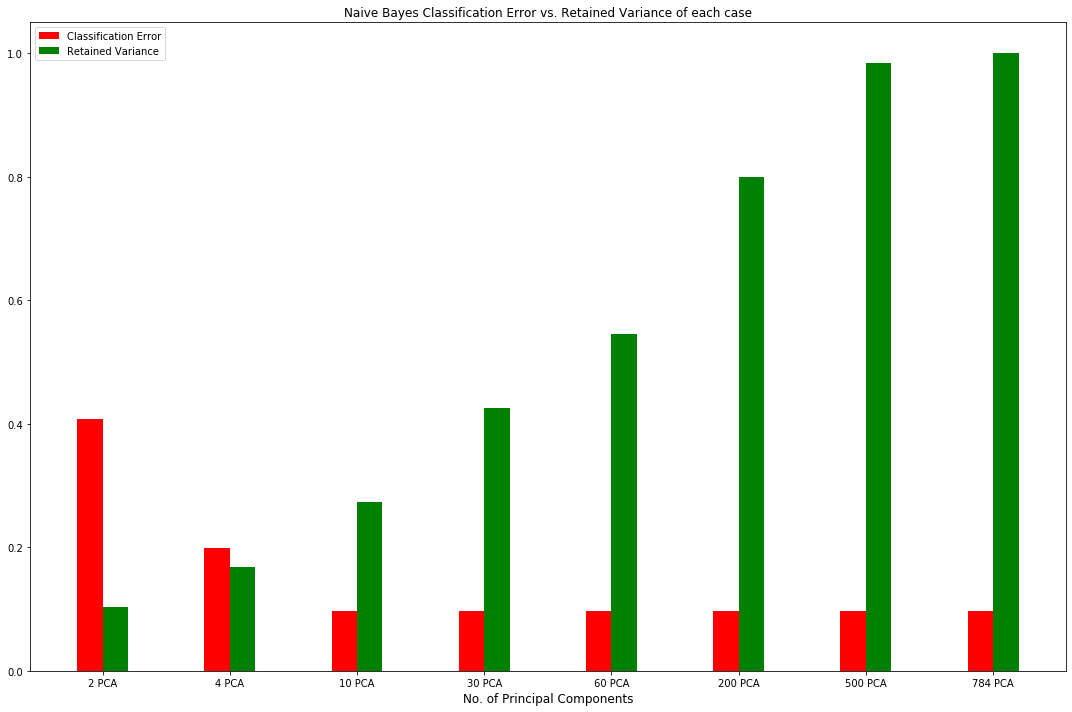

In [36]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('No. of Principal Components',fontsize = 12)
ax.set_title('Naive Bayes Classification Error vs. Retained Variance of each case')
noOfgroups = 8
index = np.arange(noOfgroups)
bar_width = 0.2
opacity = 1
p_err = np.array([cl_error_2, cl_error_4, cl_error_10, cl_error_30, cl_error_60, cl_error_200, cl_error_500, cl_error_784])
p_var = np.array([retvar_2, retvar_4, retvar_10, retvar_30, retvar_60, retvar_200,retvar_500, retvar_784])
rects1 = ax.bar(index, p_err, bar_width, alpha=opacity, color='r', label='Classification Error')
rects2 = ax.bar(index + bar_width, p_var, bar_width, alpha=opacity, color='g', label='Retained Variance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('2 PCA', '4 PCA', '10 PCA', '30 PCA', '60 PCA', '200 PCA','500 PCA', '784 PCA'))
ax.legend()
fig.tight_layout()
plt.show()

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [38]:
lda=LDA(n_components=2)

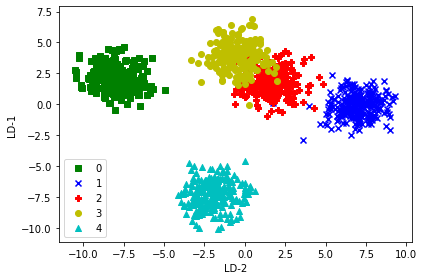

In [39]:
x_train_q2, x_test_q2, y_train_q2, y_test_q2 = train_test_split(df_dataB, gnd_dataB, test_size=0.4, random_state=45)

#print(X_train_q2)
#print(x_train_2)
#print(x_test_2)
scaler.fit(x_train_q2)
x_train_2_std=scaler.transform(x_train_q2)
#print(x_train_2_std)

scaler.fit(x_test_q2)
x_test_2_std=scaler.transform(x_test_q2)
#print(x_test_2_std)
y_train_2_values=y_train_q2.values
#print("y_train_2_values",y_train_2.values)
#fitting LDA model
#x_test_2_lda=lda.fit_transform(x_test_2_std,y_test_2.values)
#print("Value of X_test_lda",x_test_2_lda)


x_train_2_lda=lda.fit_transform(x_train_2_std,y_train_2_values)
#print("Value of X_train_lda",x_train_2_lda)

colors = ['g', 'b', 'r', 'y', 'c']
markers = ['s', 'x', 'P', 'o', '^']
for index, color, marker in zip(np.unique(y_train_2_values), colors, markers):
    plt.scatter(x_train_2_lda[y_train_2_values==index, 0], x_train_2_lda[y_train_2_values==index, 1] * (-1), c = color, label = index, marker = marker)

plt.ylabel('LD-1')
plt.xlabel('LD-2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

It is easier to separate classes using LDA than in PCA, the Classes of group 0 and 4 can be easily separated. ALso, despite being overlap the classes of 1,2 and 3 are also separable easily. However,that was not the case in PCA.


# III. Nonlinear Dimensionality Reduction (for Dataset B)

In [40]:
dataB_label3=dataB_updated[dataB_updated['gnd']==3]

In [41]:
# Removing ground column
df_dataB_label3=dataB_label3.drop(['gnd'],axis=1)
print(df_dataB_label3)

      fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
1237      3      4      2      1      3      3      0      1      2       0   
1238      4      3      5      2      0      4      3      5      5       2   
1239      0      4      2      4      2      1      4      2      3       5   
1240      2      3      1      2      2      3      1      2      3       3   
1241      0      4      2      0      5      1      3      4      3       4   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1630      1      2      1      3      3      2      3      2      5       3   
1631      2      2      1      3      1      1      1      1      3       1   
1632      5      4      3      3      4      1      4      2      2       4   
1633      2      1      3      3      1      4      4      1      1       4   
1634      1      4      1      1      1      5      5      4      5       5   

      ...  fea.775  fea.776  fea.777  fea.778  fea.

In [42]:
dataB_label3_dig=dataB_label3['gnd']
print(dataB_label3_dig)

1237    3
1238    3
1239    3
1240    3
1241    3
       ..
1630    3
1631    3
1632    3
1633    3
1634    3
Name: gnd, Length: 398, dtype: int64


[[3 4 2 ... 3 2 3]
 [4 3 5 ... 5 2 5]
 [0 4 2 ... 3 1 5]
 ...
 [5 4 3 ... 4 1 0]
 [2 1 3 ... 4 1 5]
 [1 4 1 ... 5 2 0]]


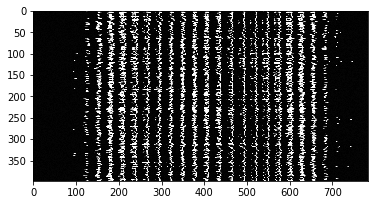

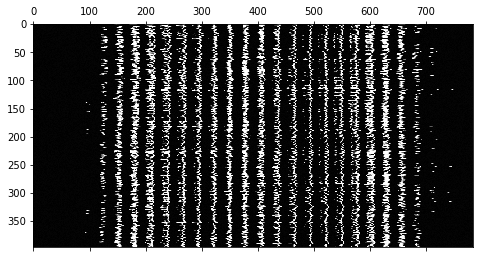

In [43]:
df_dataB_label3_matrix=df_dataB_label3.values
print(df_dataB_label3_matrix)

imageplot=plt.imshow(df_dataB_label3_matrix,cmap='gray', vmin=0, vmax=255)

matimgplot=plt.matshow(df_dataB_label3_matrix,fignum=3,cmap='gray', vmin=0, vmax=255)

In [44]:
from sklearn import manifold
lle = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=4,eigen_solver='auto', method='standard')
lle.fit(df_dataB_label3)
LLEarray_df_dataB_label3 = lle.transform(df_dataB_label3)
print(LLEarray_df_dataB_label3)
df_LLE_label3 = pd.DataFrame(LLEarray_df_dataB_label3, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])
print("LLE projected 4-dimension with columns")
df_LLE_label3

[[-0.10661802  0.00024796 -0.00639648  0.00812723]
 [ 0.03972952  0.06544692  0.02116887  0.07806559]
 [ 0.03214328 -0.10509951 -0.12156788  0.03339855]
 ...
 [ 0.03636638  0.0428634   0.03169802  0.06329229]
 [ 0.02422677  0.00856699  0.01957183  0.01233501]
 [ 0.03776513  0.0295633  -0.00973426  0.0136486 ]]
LLE projected 4-dimension with columns


,Component 1,Component 2,Component 3,Component 4
0,-0.106618,0.000248,-0.006396,0.008127
1,0.039730,0.065447,0.021169,0.078066
2,0.032143,-0.105100,-0.121568,0.033399
3,-0.040025,-0.023825,-0.025945,0.007713
4,0.024645,-0.037693,-0.036272,-0.002705
...,...,...,...,...
393,0.039119,0.073666,0.001229,-0.010151
394,0.003927,0.000648,-0.031871,-0.039810
395,0.036366,0.042863,0.031698,0.063292
396,0.024227,0.008567,0.019572,0.012335


(398, 784)
0.008608000963819239
0.011082606604564192


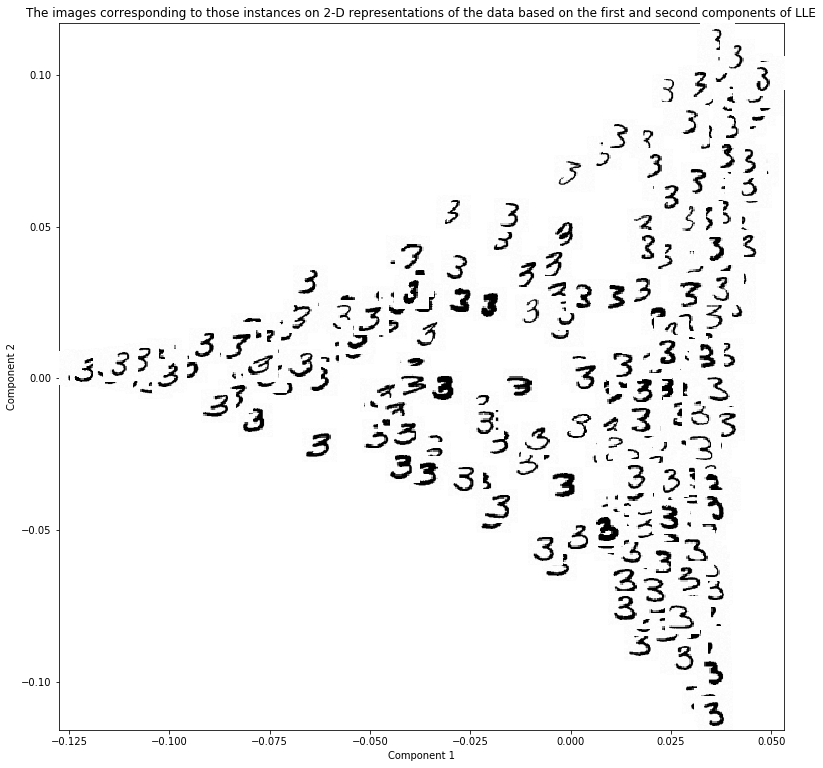

In [45]:
import math
print(df_dataB_label3.shape)
no_images, no_pixels = df_dataB_label3.shape
pixels_per_dimension = int(math.sqrt(no_pixels))

fig = plt.figure()
fig.set_size_inches(13, 13)
ax = fig.add_subplot(111)

x_size = (max(df_LLE_label3['Component 1']) - min(df_LLE_label3['Component 1'])) * 0.05
print(x_size)
y_size = (max(df_LLE_label3['Component 2']) - min(df_LLE_label3['Component 2'])) * 0.05
print(y_size)
for i in range(df_dataB_label3.shape[0]):
    img_num=i
    x0 = df_LLE_label3.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = df_LLE_label3.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = df_LLE_label3.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = df_LLE_label3.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df_dataB_label3.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto',cmap='gray_r', interpolation='nearest',zorder=100,extent=(x0, x1, y0, y1))

ax.scatter(df_LLE_label3['Component 1'],df_LLE_label3['Component 2'], marker='.')

ax.set_title('The images corresponding to those instances on 2-D representations of the data based on the first and second components of LLE')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

In [46]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=4)
Isoarray_df_dataB_label3 = iso.fit_transform(df_dataB_label3)
print(Isoarray_df_dataB_label3)
df_iso_label3 = pd.DataFrame(Isoarray_df_dataB_label3, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])
print("LLE projected 4-dimension with columns")
df_iso_label3

[[ 4374.08813981  1846.11962574  2859.11428502   255.04256323]
 [ -139.01269574  -627.65202961 -1917.86234275 -1313.95014883]
 [-2386.81800377   505.51558204  3540.24415736  -474.97248817]
 ...
 [ -633.79491793 -1047.42206777 -1658.10871054   683.2306489 ]
 [ -512.53693602  -472.77998062  -963.75319317 -2922.51221677]
 [-1863.17118709   627.05344082 -1316.08744926  -776.64610906]]
LLE projected 4-dimension with columns


,Component 1,Component 2,Component 3,Component 4
0,4374.088140,1846.119626,2859.114285,255.042563
1,-139.012696,-627.652030,-1917.862343,-1313.950149
2,-2386.818004,505.515582,3540.244157,-474.972488
3,2707.756346,1103.644366,3897.302167,-188.354470
4,-2914.155127,742.414660,1522.145555,3931.599361
...,...,...,...,...
393,-762.988822,1139.177212,-2128.268387,-189.627333
394,269.877938,2218.388661,2725.516869,-475.302340
395,-633.794918,-1047.422068,-1658.108711,683.230649
396,-512.536936,-472.779981,-963.753193,-2922.512217


562.5916709670399
489.7675919300363


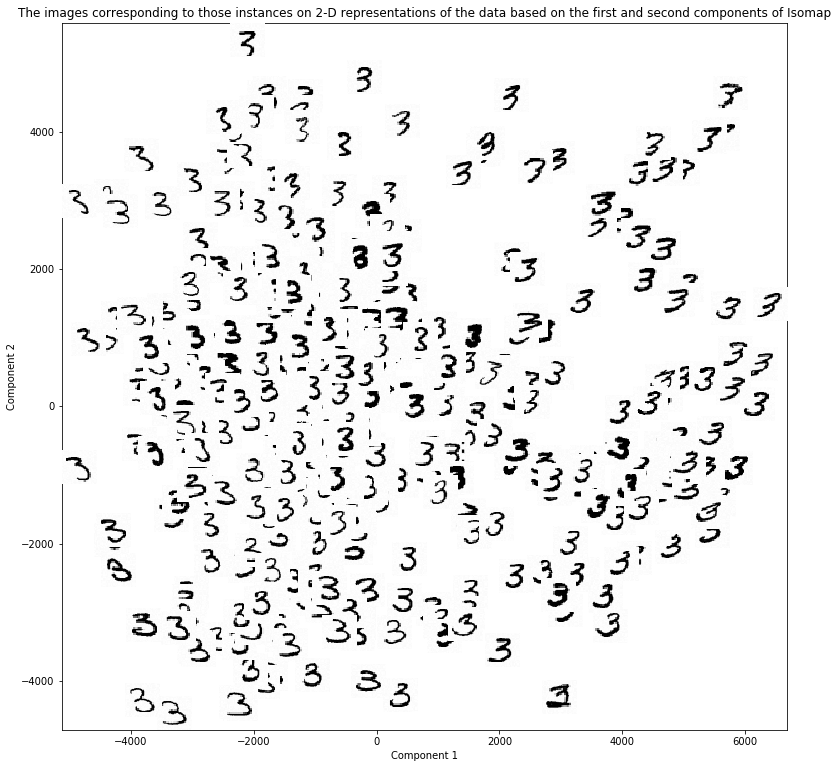

In [47]:
fig = plt.figure()
fig.set_size_inches(13, 13)
ax = fig.add_subplot(111)

x_size = (max(df_iso_label3['Component 1']) - min(df_iso_label3['Component 1'])) * 0.05
print(x_size)
y_size = (max(df_iso_label3['Component 2']) - min(df_iso_label3['Component 2'])) * 0.05
print(y_size)
for i in range(df_dataB_label3.shape[0]):
    img_num=i
    x0 = df_iso_label3.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = df_iso_label3.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = df_iso_label3.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = df_iso_label3.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df_dataB_label3.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto',cmap='gray_r', interpolation='nearest',zorder=100,extent=(x0, x1, y0, y1))

ax.scatter(df_iso_label3['Component 1'],df_iso_label3['Component 2'], marker='.')

ax.set_title('The images corresponding to those instances on 2-D representations of the data based on the first and second components of Isomap')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.show()

Isomap tries to preserve the distances along the manifold by using
geodesic (or curvilinear) distance or approximation which makes Isomap extremely slow to calculate

## 3. Naive Bayers to classify projected 4-dimension representations of LLE and ISOMAP

In [48]:
#LLE for the entire data set, projected low dimension =4
lle = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=4, method='standard')
df_LLE = lle.fit_transform(dataB_updated)
df_LLE = pd.DataFrame(df_LLE, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])
print("LLE projected 4-dimension")
df_LLE


#No of folds
k=10

#Accuracy list for LLE
lle_accuracy=[]

for i in range(k):

    # Classification based on projected 4-dimension representations of LLE
    x_train_lle, x_test_lle, y_train_lle, y_test_lle = train_test_split(df_LLE, gnd_dataB, test_size = 0.3,random_state = i+10)
    model.fit(x_train_lle, y_train_lle)
    y_predict_lle = model.predict(x_test_lle)
    acc=accuracy_score(y_test_lle,y_predict_lle)
    lle_accuracy.append(acc)
                                      
                                      
#IsoMap
                        
#Isomap for the entire data set, projected low dimension =4
iso = manifold.Isomap(n_neighbors=5, n_components=4)
df_iso = iso.fit_transform(dataB_updated)
df_iso = pd.DataFrame(df_iso, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])
print("isomap projected 4-dimension")                                     
df_iso                                      

iso_accuracy=[]

for i in range(k):
    
    #Classification based on projected 4-dimension reprentations of Isomap
    x_train_iso, x_test_iso, y_train_iso, y_test_iso = train_test_split(df_iso, gnd_dataB, test_size = 0.3,train_size=0.7,random_state = i+10)
    model.fit(x_train_iso, y_train_iso)
    y_predict_iso = model.predict(x_test_iso)
    acc=accuracy_score(y_test_iso,y_predict_iso)
    iso_accuracy.append(acc)
    
    
    
#PCA

#PCA for the entire data set, projected low dimension =4
p = df.astype(float)
scaler = StandardScaler()
p = scaler.fit_transform(p)
pca = PCA(n_components=4)
pca_array = pca.fit_transform(p)
df_PCA = pd.DataFrame(pca_array, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])

print("PCA projected 4-dimension")
df_PCA
    
pca_accuracy=[]

for i in range(k):
    
    #Classification based on projected 4-dimension reprentations of PCA
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_PCA4, gnd_dataB, test_size = 0.3,train_size=0.7,random_state = i+10)
    model.fit(x_train_pca, y_train_pca)
    y_predict_pca = model.predict(x_test_pca)
    acc=accuracy_score(y_test_pca,y_predict_pca)
    pca_accuracy.append(acc)
    
#LDA 
lda=LDA(n_components=4)
df_lda= lda.fit(dataB_updated, gnd_dataB).transform(dataB_updated)
df_lda = pd.DataFrame(df_lda, columns=['Component 1', 'Component 2','Component 3', 'Component 4'])
print("LDA projected 4-dimension")
df_lda

lda_accuracy=[]

for i in range(k):
    
    #Classification based on projected 4-dimension reprentations of PCA
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_lda, gnd_dataB, test_size = 0.3,train_size=0.7,random_state = i+10)
    model.fit(x_train_pca, y_train_pca)
    y_predict_pca = model.predict(x_test_pca)
    acc=accuracy_score(y_test_pca,y_predict_pca)
    lda_accuracy.append(acc)
    

LLE projected 4-dimension
isomap projected 4-dimension
PCA projected 4-dimension
LDA projected 4-dimension


In [49]:
#Accuracy lists with different random states from 11 to 20

print("Accuracy list of LLE",lle_accuracy)
print("\n")
print("Accuracy list of IsoMap",iso_accuracy)
print("\n")
print("Accuracy list of PCA",pca_accuracy)
print("\n")
print("Accuracy list of LDA",lda_accuracy)

Accuracy list of LLE [0.9145161290322581, 0.917741935483871, 0.9209677419354839, 0.9096774193548387, 0.932258064516129, 0.9290322580645162, 0.9193548387096774, 0.9338709677419355, 0.9145161290322581, 0.9258064516129032]


Accuracy list of IsoMap [0.882258064516129, 0.864516129032258, 0.9032258064516129, 0.8693548387096774, 0.8774193548387097, 0.882258064516129, 0.8709677419354839, 0.8790322580645161, 0.8725806451612903, 0.8774193548387097]


Accuracy list of PCA [0.7951612903225806, 0.7806451612903226, 0.7870967741935484, 0.7790322580645161, 0.8048387096774193, 0.7903225806451613, 0.7838709677419354, 0.8016129032258065, 0.7758064516129032, 0.7887096774193548]


Accuracy list of LDA [0.9919354838709677, 0.9967741935483871, 0.9935483870967742, 0.9951612903225806, 0.9967741935483871, 0.9967741935483871, 0.9887096774193549, 0.9935483870967742, 0.9951612903225806, 0.9967741935483871]


In [50]:
#Average classification Accuracy
Avg_lle_accuracy=sum(lle_accuracy)/len(lle_accuracy)
Avg_iso_accuracy=sum(iso_accuracy)/len(iso_accuracy)
Avg_pca_accuracy=sum(pca_accuracy)/len(pca_accuracy)
Avg_lda_accuracy=sum(lda_accuracy)/len(lda_accuracy)

print("Average Accuracy of LLE",Avg_lle_accuracy)
print("Average Accuracy of ISO",Avg_iso_accuracy)
print("Average Accuracy of PCA",Avg_pca_accuracy)
print("Average Accuracy of LDA",Avg_lda_accuracy)

Average Accuracy of LLE 0.921774193548387
Average Accuracy of ISO 0.8779032258064514
Average Accuracy of PCA 0.7887096774193548
Average Accuracy of LDA 0.9945161290322581


## Analysis: PCA gives the worst Accuracy amongst the others: LLE, ISOMAP and LDA.

Since Linear Discriminant Analysis (LDA) is a supervised approach that maximizes the between-class scatter wile mainiting fixed within-class scatter and best discriminates the data in lower dimensions as in lecture notes.Hence it can be seen that the AVerage Accuracy is best that is 99.47% 

Principal Component Analysis (PCA) maximize the variance by rotating the coordinates and finding the new axes with maximum variance but it is not best for discrimnating between classes and for non-linear correlation hence it gives a lowest accuracy of 79.21%

In case of non-linear dimensionality reduction methods, LLE is better than Isomap because it consideres the ocal properties by combination of neighbours describes each point as a combination of its neighbors which makes it better than Isomap which only captures the geomeric properies of the space in which data is present